# Teorija Grafova - Uvodni Pojmovi

### Sadržaj:
1. [Istorijski osvrt na teoriju grafova](#1-istorijski-osvrt)
2. [Problem sedam mostova Kenigsberga](#2-problem-sedam-mostova)
3. [Oblasti primene teorije grafova](#3-oblasti-primene)
4. [Definicije različitih kategorija grafova](#4-definicije-grafova)
5. [Jednakost i izomorfizam grafova](#5-jednakost-i-izomorfizam)
6. [Potrebni uslovi za izomorfizam](#6-potrebni-uslovi-izomorfizam)
7. [Relacija ekvivalencije](#7-relacija-ekvivalencije)
8. [Algoritam za ispitivanje izomorfizma](#8-algoritam-izomorfizam)
9. [Podgrafovi i indukovani podgrafovi](#9-podgrafovi)

## 1. Istorijski osvrt na teoriju grafova

Teorija grafova je nastala 1736. godine kada je švajcarski matematičar **Leonard Ojler** rešio čuveni problem sedam mostova Kenigsberga. Ovo je bio prvi put da je matematički problem rešen korišćenjem grafovske reprezentacije.

### Ključne etape razvoja:
- **1736**: Ojler rešava problem Kenigsberških mostova
- **1840-1850**: Gustav Kirhof koristi grafove u teoriji električnih kola
- **1857**: Arthur Kejli koristi grafove u hemiji (molekularne strukture)
- **1930-1950**: Formalizacija teorije grafova kao matematičke discipline
- **1960-danas**: Nagli razvoj zbog primena u informatici

## 2. Problem 7 mostova Kenigsberga

Grad Kenigsberg (danas Kaljiningrad) bio je smešten na reci Pregel i imao je četiri kopnene oblasti povezane sa sedam mostova. Građani su se zabavljali pokušavajući da pređu svaki most tačno jednom i vrate se na početnu tačku. Međutim, bez obzira na pokušaje, to nije bilo moguće.

Leonard Ojler je prvi abstrahovao geografski problem u matematičku strukturu koju danas zovemo graf. Umesto da razmatra konkretne obale i mostove, predstavio je problem ovako:

*   Svaka kopnena oblast (ostrvo ili deo obale) → **čvor** (teme) grafa
*   Svaki most → **grana** (ivica) koja povezuje dva čvora

Tako je nastao prvi poznati model grafa u istoriji matematike.

**Ojlerov graf**

**Definicija**:
Neusmeren graf je Ojlerov ako postoji zatvorena putanja koja prolazi svakom ivicom tačno jednom i završava se u početnom čvoru. Ovakva putanja poznata je i kao **Ojelrova tura**. Neusmeren povezan graf je Ojlerov ako i samo ako svaki čvor u grafu ima **paran** stepen.

**Polu Ojlerov graf**

**Definicija**:
Neusmeren graf je polu Ojlerov ako postoji otvorena putanja koja prolazi svakom ivicom tačno jednom, ali počinje i završava u različitim čvorovima. Ovakva putanja poznata je i kao **Ojlerov put**. Neusmeren povezan graf je polu Ojlerov ako i samo ako ima tačno dva čvora neparnog stepena, a svi ostali čvorovi imaju paran stepen.

### Ojlerova teorema o putanjama:
**Teorema**: Graf ima Ojlerovu putanju (putanja koja prolazi kroz svaku granu tačno jednom) ako i samo ako ima tačno 0 ili 2 čvora neparnog stepena. 

**Ojlerova kružna putanja** postoji ako i samo ako su svi čvorovi parnog stepena. 
U Kenigsbergskom grafu svi čvorovi imaju neparan stepen, pa Ojlerova putanja ne postoji.

## 3. Oblasti primene teorije grafova 

### 3.1 Informatika i algoritmi
- **Strukture podataka**: stabla, heš tabele
- **Algoritmi pretrage**: BFS, DFS
- **Optimizacija**: najkraći putevi, minimalno razapinjuće stablo
- **Mašinsko učenje**: neuronske mreže

### 3.2 Društvene mreže
- Analiza povezanosti korisnika
- Detekcija zajednica
- Širenje informacija
- Preporuke prijatelja

### 3.3 Bioinformatika
- Protein-protein interakcije
- Filogenetska stabla
- Metaboličke mreže
- DNK sekvenciranje

### 3.4 Transport i logistika
- Planiranje ruta
- Optimizacija saobraćaja
- Mreže snabdevanja
- GPS navigacija

### 3.5 Hemija i fizika
- Molekularne strukture
- Kristalne rešetke
- Kvantna stanja
- Fazni prelazi

## 4. Definicije različitih kategorija grafova

### 4.1 Usmeren multigraf

**Definicija**: Usmeren multigraf je trojka $G = (V, E, \phi)$, gde:
- $V \neq \emptyset$ je konačan skup čvorova (vertices)
- $E$ je konačan skup grana (edges)
- $\phi: E \to V \times V$ je funkcija incidencije
- Dozvoljena je višestrukost grana i petlje

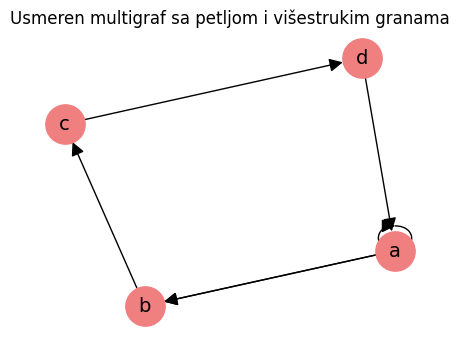

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Kreiranje usmerenog multigrafa
DG = nx.MultiDiGraph()
DG.add_nodes_from(['a', 'b', 'c', 'd'])
DG.add_edges_from([('a', 'b'), ('a', 'b'), ('b', 'c'), ('c', 'd'), 
                   ('d', 'a'), ('a', 'a')])  # Uključuje i petlju

plt.figure(figsize=(4, 3))
pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_color='lightcoral', 
        node_size=800, arrowsize=20, font_size=14)
plt.title("Usmeren multigraf sa petljom i višestrukim granama")
plt.show()

### 4.2 Neusmeren multigraf

**Definicija**: Neusmeren multigraf je trojka $G = (V, E, \phi)$, gde:
- $V \neq \emptyset$ je konačan skup čvorova
- $E$ je konačan skup grana
- $\phi: E \to \{\{u,v\} : u,v \in V\}$ je funkcija incidencije
- Dozvoljena je višestrukost grana

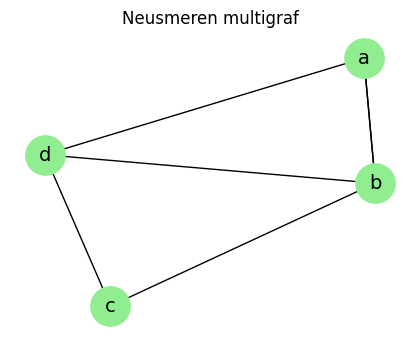

In [18]:
# Kreiranje neusmerenog multigrafa
MG = nx.MultiGraph()
MG.add_nodes_from(['a', 'b', 'c', 'd'])
MG.add_edges_from([('a', 'b'), ('a', 'b'), ('b', 'c'), ('c', 'd'), 
                   ('d', 'a'), ('b', 'd')])

plt.figure(figsize=(4, 3))
pos = nx.spring_layout(MG, seed=42)
nx.draw(MG, pos, with_labels=True, node_color='lightgreen', 
        node_size=800, font_size=14)
plt.title("Neusmeren multigraf")
plt.show()

### 4.3 Prost graf

**Definicija**: Prost graf je par $G = (V, E)$, gde:
- $V \neq \emptyset$ je konačan skup čvorova
- $E \subseteq \binom{V}{2} = \{\{u,v\} : u,v \in V, u \neq v\}$
- Nema višestrukih grana ni petlji

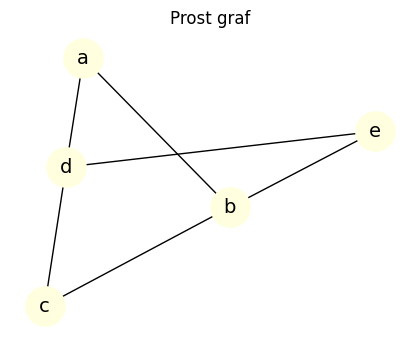

Karakteristike prostog grafa:
Broj čvorova: 5
Broj grana: 6
Stepeni čvorova: {'a': 2, 'b': 3, 'c': 2, 'd': 3, 'e': 2}


In [19]:
# Kreiranje prostog grafa
SG = nx.Graph()
SG.add_nodes_from(['a', 'b', 'c', 'd', 'e'])
SG.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), 
                   ('a', 'd'), ('b', 'e')])

plt.figure(figsize=(4, 3))
pos = nx.spring_layout(SG, seed=42)
nx.draw(SG, pos, with_labels=True, node_color='lightyellow', 
        node_size=800, font_size=14)
plt.title("Prost graf")
plt.show()

print("Karakteristike prostog grafa:")
print(f"Broj čvorova: {len(SG.nodes())}")
print(f"Broj grana: {len(SG.edges())}")
print(f"Stepeni čvorova: {dict(SG.degree())}")

### 4.4 Potpun graf

**Definicija**: Potpun graf $K_n$ je prost graf sa $n$ čvorova gde je svaki par čvorova povezan granom.
- $|V| = n$
- $|E| = \binom{n}{2} = \frac{n(n-1)}{2}$
- $\deg(v) = n-1$ for all $v \in V$

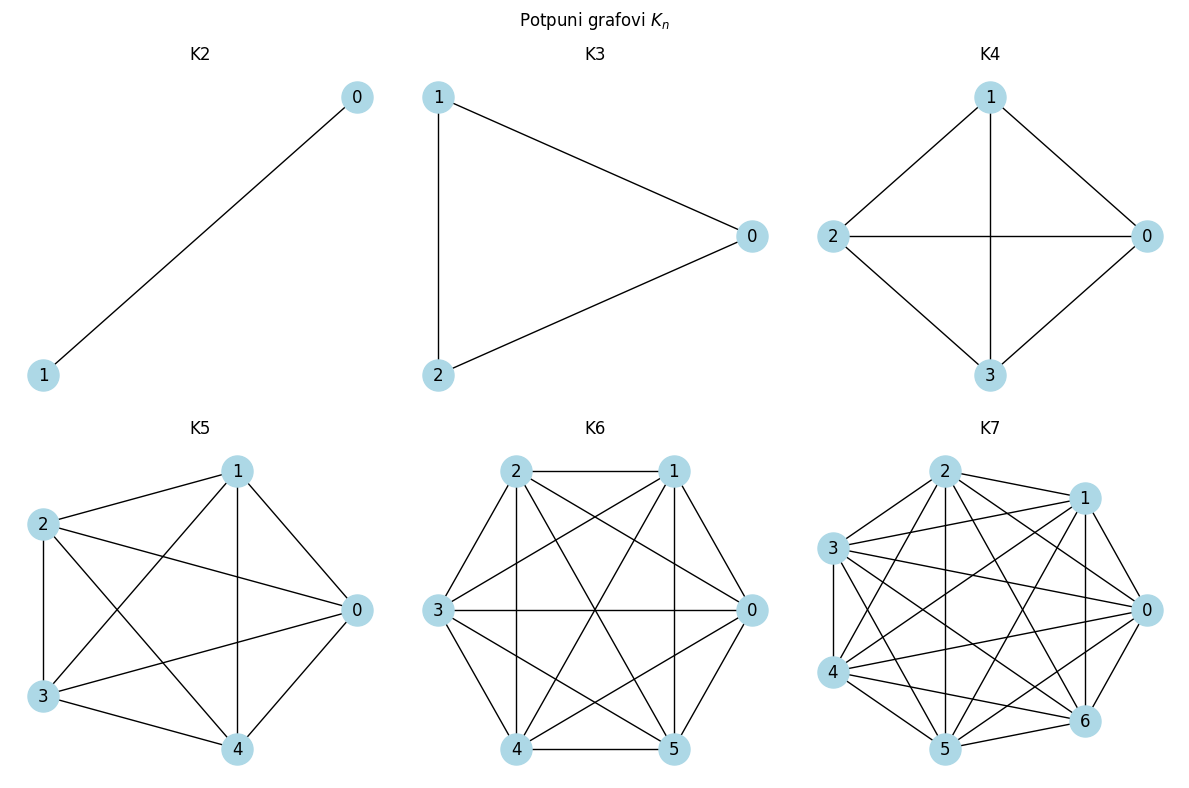

In [45]:
# Kreiranje potpunih grafova
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Potpuni grafovi $K_n$")

for i, n in enumerate([2, 3, 4, 5, 6, 7]):
    row = i // 3
    col = i % 3
    
    K = nx.complete_graph(n)
    pos = nx.circular_layout(K)
    
    nx.draw(K, pos, ax=axes[row, col], with_labels=True, 
            node_color='lightblue', node_size=500)
    axes[row, col].set_title(f"K{n}")

plt.tight_layout()
plt.show()

### 4.5 Bipartitni graf

**Definicija**: Graf $G = (V_1 \cup V_2, E)$ je bipartitni ako:
- $V_1 \cap V_2 = \emptyset$
- $E \subseteq \{\{v_1, v_2\} : v_1 \in V_1, v_2 \in V_2\}$

**Potpun bipartitni graf** $K_{m,n}$ ima $|V_1| = m, |V_2| = n$, i $|E| = m \cdot n$.

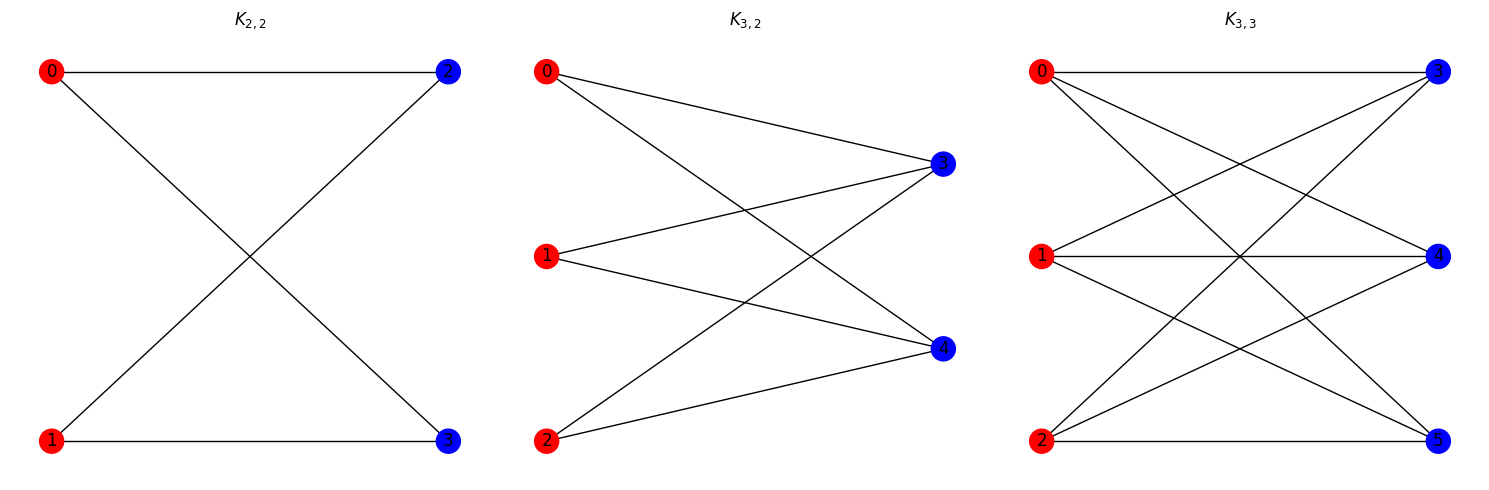

In [24]:
# Kreiranje bipartitnih grafova
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K_{2,2}
G1 = nx.complete_bipartite_graph(2, 2)
pos1 = {0: (0, 1), 1: (0, 0), 2: (2, 1), 3: (2, 0)}
nx.draw(G1, pos1, ax=axes[0], with_labels=True, 
        node_color=['red', 'red', 'blue', 'blue'])
axes[0].set_title("$K_{2,2}$")

# K_{3,2}
G2 = nx.complete_bipartite_graph(3, 2)
pos2 = {0: (0, 2), 1: (0, 1), 2: (0, 0), 3: (2, 1.5), 4: (2, 0.5)}
nx.draw(G2, pos2, ax=axes[1], with_labels=True,
        node_color=['red', 'red', 'red', 'blue', 'blue'])
axes[1].set_title("$K_{3,2}$")

# K_{3,3}
G3 = nx.complete_bipartite_graph(3, 3)
pos3 = {0: (0, 2), 1: (0, 1), 2: (0, 0), 3: (2, 2), 4: (2, 1), 5: (2, 0)}
nx.draw(G3, pos3, ax=axes[2], with_labels=True,
        node_color=['red', 'red', 'red', 'blue', 'blue', 'blue'])
axes[2].set_title("$K_{3,3}$")

plt.tight_layout()
plt.show()

## 5. Jednakost i izomorfizam grafova

### 5.1 Jednakost grafova

**Definicija**: Dva grafa $G_1 = (V_1, E_1)$ i $G_2 = (V_2, E_2)$ su **jednaka** ako i samo ako:
- $V_1 = V_2$
- $E_1 = E_2$

### 5.2 Izomorfizam grafova

**Definicija**: Grafovi $G_1 = (V_1, E_1)$ i $G_2 = (V_2, E_2)$ su **izomorfni** ako postoji bijekcija 
$h: V_1 \to V_2$ takva da je:

$\{u, v\} \in E_1 \iff \{h(u), h(v)\} \in E_2$

Funkcija $h$ se naziva **izomorfizam** između $G_1$ i $G_2$.
**Notacija**: $G_1 \cong G_2$

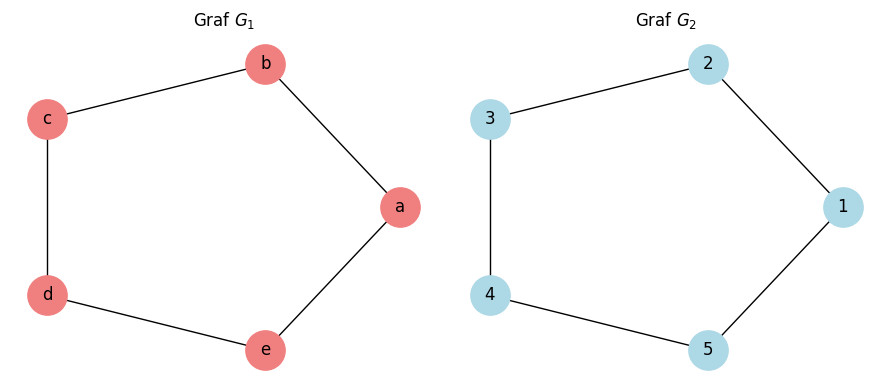

Izomorfizam $h: V_1 	o V_2$
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
Da li su grafovi izomorfni: True
Jedan od izomorfizama: {'a': 1, 'e': 2, 'd': 3, 'c': 4, 'b': 5}


In [26]:
def create_isomorphic_example():
    """Kreiranje primera dva izomorfna grafa"""
    
    # Graf G1
    G1 = nx.Graph()
    G1.add_nodes_from(['a', 'b', 'c', 'd', 'e'])
    G1.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'a')])
    
    # Graf G2 - izomorfan sa G1 (oba su ciklusi C5)
    G2 = nx.Graph()
    G2.add_nodes_from([1, 2, 3, 4, 5])
    G2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])
    
    return G1, G2

def visualize_isomorphic_graphs(G1, G2):
    """Vizualizacija dva izomorfna grafa"""
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    
    # G1
    pos1 = nx.circular_layout(G1)
    nx.draw(G1, pos1, ax=axes[0], with_labels=True, 
            node_color='lightcoral', node_size=800)
    axes[0].set_title("Graf $G_1$")
    
    # G2  
    pos2 = nx.circular_layout(G2)
    nx.draw(G2, pos2, ax=axes[1], with_labels=True,
            node_color='lightblue', node_size=800)
    axes[1].set_title("Graf $G_2$")
    
    plt.tight_layout()
    plt.show()

G1, G2 = create_isomorphic_example()
visualize_isomorphic_graphs(G1, G2)

# Izomorfizam između G1 i G2
isomorphism_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
print("Izomorfizam $h: V_1 \to V_2$")
print(isomorphism_map)

# Provera izomorfizma
from networkx.algorithms import isomorphism
GM = isomorphism.GraphMatcher(G1, G2)
print(f"Da li su grafovi izomorfni: {GM.is_isomorphic()}")
if GM.is_isomorphic():
    print(f"Jedan od izomorfizama: {GM.mapping}")

### 5.3 Primer neizomorfnih grafova

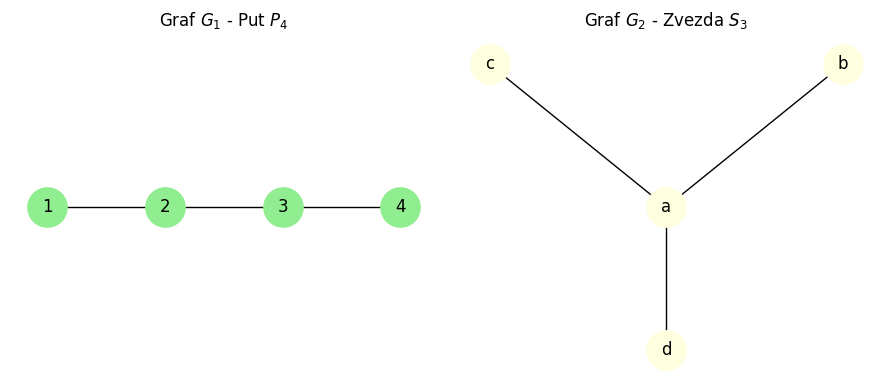

Analiza grafova:
G1: |V| = 4, |E| = 3
G2: |V| = 4, |E| = 3
Stepeni čvorova G1: [1, 1, 2, 2]
Stepeni čvorova G2: [1, 1, 1, 3]
Da li su grafovi izomorfni: False


In [29]:
def create_non_isomorphic_example():
    """Kreiranje primera dva neizomorfna grafa sa istim brojem čvorova i grana"""
    
    # Graf G1 - put P4
    G1 = nx.Graph()
    G1.add_nodes_from([1, 2, 3, 4])
    G1.add_edges_from([(1, 2), (2, 3), (3, 4)])
    
    # Graf G2 - zvezda S3
    G2 = nx.Graph()  
    G2.add_nodes_from(['a', 'b', 'c', 'd'])
    G2.add_edges_from([('a', 'b'), ('a', 'c'), ('a', 'd')])
    
    return G1, G2

G1_non, G2_non = create_non_isomorphic_example()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# G1 - put
pos1 = {1: (0, 0), 2: (1, 0), 3: (2, 0), 4: (3, 0)}
nx.draw(G1_non, pos1, ax=axes[0], with_labels=True,
        node_color='lightgreen', node_size=800)
axes[0].set_title("Graf $G_1$ - Put $P_4$")

# G2 - zvezda
pos2 = {'a': (0, 0), 'b': (1, 1), 'c': (-1, 1), 'd': (0, -1)}
nx.draw(G2_non, pos2, ax=axes[1], with_labels=True,
        node_color='lightyellow', node_size=800)
axes[1].set_title("Graf $G_2$ - Zvezda $S_3$")

plt.tight_layout()
plt.show()

print("Analiza grafova:")
print(f"G1: |V| = {len(G1_non.nodes())}, |E| = {len(G1_non.edges())}")
print(f"G2: |V| = {len(G2_non.nodes())}, |E| = {len(G2_non.edges())}")
print(f"Stepeni čvorova G1: {sorted(dict(G1_non.degree()).values())}")
print(f"Stepeni čvorova G2: {sorted(dict(G2_non.degree()).values())}")

GM_non = isomorphism.GraphMatcher(G1_non, G2_non)
print(f"Da li su grafovi izomorfni: {GM_non.is_isomorphic()}")

## 6. Potrebni uslovi za izomorfizam 

**Teorema**: Ako su grafovi $G_1 = (V_1, E_1)$ i $G_2 = (V_2, E_2)$ izomorfni, tada mora biti:

1. **$|V_1| = |V_2|$** (isti broj čvorova)
2. **$|E_1| = |E_2|$** (isti broj grana)  
3. **$\deg_{G_1}(v) = \deg_{G_2}(h(v))$** za svaki čvor $v \in V_1$ (izomorfizam čuva stepene)

Posledica: **Sekvence stepena moraju biti identične**

### Implementacija provere potrebnih uslova:

In [30]:
def necessary_conditions_for_isomorphism(G1, G2):
    """
    Provera potrebnih uslova za izomorfizam između dva grafa
    """
    print("=== POTREBNI USLOVI ZA IZOMORFIZAM ===")
    
    # Uslov 1: Isti broj čvorova
    v1, v2 = len(G1.nodes()), len(G2.nodes())
    print(f"1. Broj čvorova: G1 = {v1}, G2 = {v2}")
    cond1 = v1 == v2
    print(f"   Uslov ispunjen: {cond1}")
    
    # Uslov 2: Isti broj grana
    e1, e2 = len(G1.edges()), len(G2.edges())
    print(f"2. Broj grana: G1 = {e1}, G2 = {e2}")
    cond2 = e1 == e2
    print(f"   Uslov ispunjen: {cond2}")
    
    # Uslov 3: Identične sekvence stepena
    deg1 = sorted([d for n, d in G1.degree()])
    deg2 = sorted([d for n, d in G2.degree()])
    print(f"3. Sekvence stepena:")
    print(f"   G1: {deg1}")
    print(f"   G2: {deg2}")
    cond3 = deg1 == deg2
    print(f"   Uslov ispunjen: {cond3}")
    
    # Zaključak
    all_conditions = cond1 and cond2 and cond3
    print(f"\n4. SVI POTREBNI USLOVI: {all_conditions}")
    
    if all_conditions:
        print("   ✓ Grafovi mogu biti izomorfni (potrebna dalja analiza)")
    else:
        print("   ✗ Grafovi NISU izomorfni")
        
    return all_conditions

# Test sa izomorfnim grafovima
print("PRIMER 1: Izomorfni grafovi")
necessary_conditions_for_isomorphism(G1, G2)

print("\n" + "="*50 + "\n")

# Test sa neizomorfnim grafovima  
print("PRIMER 2: Neizomorfni grafovi")
necessary_conditions_for_isomorphism(G1_non, G2_non)

PRIMER 1: Izomorfni grafovi
=== POTREBNI USLOVI ZA IZOMORFIZAM ===
1. Broj čvorova: G1 = 5, G2 = 5
   Uslov ispunjen: True
2. Broj grana: G1 = 5, G2 = 5
   Uslov ispunjen: True
3. Sekvence stepena:
   G1: [2, 2, 2, 2, 2]
   G2: [2, 2, 2, 2, 2]
   Uslov ispunjen: True

4. SVI POTREBNI USLOVI: True
   ✓ Grafovi mogu biti izomorfni (potrebna dalja analiza)


PRIMER 2: Neizomorfni grafovi
=== POTREBNI USLOVI ZA IZOMORFIZAM ===
1. Broj čvorova: G1 = 4, G2 = 4
   Uslov ispunjen: True
2. Broj grana: G1 = 3, G2 = 3
   Uslov ispunjen: True
3. Sekvence stepena:
   G1: [1, 1, 2, 2]
   G2: [1, 1, 1, 3]
   Uslov ispunjen: False

4. SVI POTREBNI USLOVI: False
   ✗ Grafovi NISU izomorfni


False

### Primer grafova koji zadovoljavaju potrebne uslove ali nisu izomorfni:

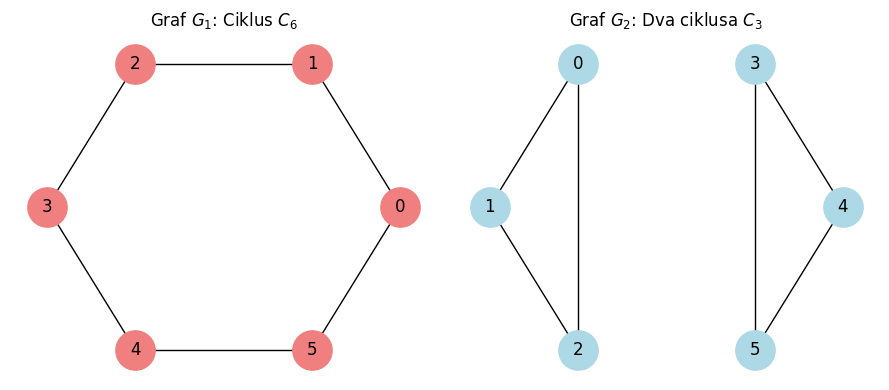

PRIMER 3: Grafovi sa istim osnovnim karakteristikama
=== POTREBNI USLOVI ZA IZOMORFIZAM ===
1. Broj čvorova: G1 = 6, G2 = 6
   Uslov ispunjen: True
2. Broj grana: G1 = 6, G2 = 6
   Uslov ispunjen: True
3. Sekvence stepena:
   G1: [2, 2, 2, 2, 2, 2]
   G2: [2, 2, 2, 2, 2, 2]
   Uslov ispunjen: True

4. SVI POTREBNI USLOVI: True
   ✓ Grafovi mogu biti izomorfni (potrebna dalja analiza)

Rezultat detaljne analize: Izomorfni = False
Razlog: Graf G1 je povezan, dok G2 ima 2 komponente povezanosti


In [32]:
def create_same_conditions_non_isomorphic():
    """
    Kreiranje grafova koji zadovoljavaju potrebne uslove ali nisu izomorfni
    """
    # Graf 1: Ciklus C6 
    G1 = nx.cycle_graph(6)
    
    # Graf 2: Dva disjunktna ciklusa C3
    G2 = nx.Graph()
    G2.add_edges_from([(0, 1), (1, 2), (2, 0)])  # Prvi C3
    G2.add_edges_from([(3, 4), (4, 5), (5, 3)])  # Drugi C3
    
    return G1, G2

G1_same, G2_same = create_same_conditions_non_isomorphic()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Graf 1 - C6
pos1 = nx.circular_layout(G1_same)
nx.draw(G1_same, pos1, ax=axes[0], with_labels=True,
        node_color='lightcoral', node_size=800)
axes[0].set_title("Graf $G_1$: Ciklus $C_6$")

# Graf 2 - 2xC3
pos2 = {0: (-1, 1), 1: (-2, 0), 2: (-1, -1), 
        3: (1, 1), 4: (2, 0), 5: (1, -1)}
nx.draw(G2_same, pos2, ax=axes[1], with_labels=True,
        node_color='lightblue', node_size=800)
axes[1].set_title("Graf $G_2$: Dva ciklusa $C_3$")

plt.tight_layout()
plt.show()

print("PRIMER 3: Grafovi sa istim osnovnim karakteristikama")
necessary_conditions_for_isomorphism(G1_same, G2_same)

GM_same = isomorphism.GraphMatcher(G1_same, G2_same)
print(f"\nRezultat detaljne analize: Izomorfni = {GM_same.is_isomorphic()}")
print("Razlog: Graf G1 je povezan, dok G2 ima 2 komponente povezanosti")

## 7. Relacija ekvivalencije

**Teorema**: Relacija "je izomorfan sa" ($\cong$) na skupu svih prostih grafova je relacija ekvivalencije.

**Dokaz**: Treba pokazati da relacija $\cong$ zadovoljava tri svojstva:

### 7.1 Refleksivnost

**Tvrdnja**: Za svaki graf $G$ važi $G \cong G$

**Dokaz**: Identička funkcija $id: V(G) \to V(G)$, $id(v) = v$ je izomorfizam:
- $id$ je bijekcija
- $\{u,v\} \in E(G) \iff \{id(u), id(v)\} = \{u,v\} \in E(G)$ ✓

### 7.2 Simetričnost  

**Tvrdnja**: Ako je $G_1 \cong G_2$, tada je $G_2 \cong G_1$

**Dokaz**: Ako $h: V(G_1) \to V(G_2)$ je izomorfizam, tada $h^{-1}: V(G_2) \to V(G_1)$ takođe jeste:
- $h^{-1}$ je bijekcija (inverz bijekcije)
- $\{u,v\} \in E(G_2) \iff \{h^{-1}(u), h^{-1}(v)\} \in E(G_1)$ (iz definicije $h$) ✓

### 7.3 Tranzitivnost

**Tvrdnja**: Ako je $G_1 \cong G_2$ i $G_2 \cong G_3$, tada je $G_1 \cong G_3$

**Dokaz**: Neka su $h_1: V(G_1) \to V(G_2)$ i $h_2: V(G_2) \to V(G_3)$ izomorfizmi. Kompozicija $h = h_2 \circ h_1: V(G_1) \to V(G_3)$ je izomorfizam:
- $h$ je bijekcija (kompozicija bijekcija)
- $\{u,v\} \in E(G_1) \iff \{h_1(u), h_1(v)\} \in E(G_2) \iff \{h_2(h_1(u)), h_2(h_1(v))\} \in E(G_3) \iff \{h(u), h(v)\} \in E(G_3)$ ✓

In [33]:
def demonstrate_equivalence_relation():
    """
    Demonstracija da je izomorfizam relacija ekvivalencije
    """
    print("=== RELACIJA EKVIVALENCIJE ===")
    
    # Kreiramo tri grafa
    G1 = nx.Graph([(0, 1), (1, 2), (2, 0)])  # Trougao sa čvorovima 0,1,2
    G2 = nx.Graph([('a', 'b'), ('b', 'c'), ('c', 'a')])  # Trougao sa čvorovima a,b,c  
    G3 = nx.Graph([(10, 20), (20, 30), (30, 10)])  # Trougao sa čvorovima 10,20,30
    
    # Proveravamo izomorfizam
    GM12 = isomorphism.GraphMatcher(G1, G2)
    GM23 = isomorphism.GraphMatcher(G2, G3) 
    GM13 = isomorphism.GraphMatcher(G1, G3)
    
    iso12 = GM12.is_isomorphic()
    iso23 = GM23.is_isomorphic() 
    iso13 = GM13.is_isomorphic()
    
    print("1. REFLEKSIVNOST: $G \cong G$")
    GM11 = isomorphism.GraphMatcher(G1, G1)
    print(f"   $G_1 \cong G_1$: {GM11.is_isomorphic()} ✓")
    
    print("\n2. SIMETRIČNOST: $G_1 \cong G_2 \implies G_2 \cong G_1$")
    GM21 = isomorphism.GraphMatcher(G2, G1)
    print(f"   $G_1 \cong G_2$: {iso12}")
    print(f"   $G_2 \cong G_1$: {GM21.is_isomorphic()}")
    print(f"   Simetričnost: {iso12 == GM21.is_isomorphic()} ✓")
    
    print("\n3. TRANZITIVNOST: $G_1 \cong G_2 \land G_2 \cong G_3 \implies G_1 \cong G_3$")
    print(f"   $G_1 \cong G_2$: {iso12}")
    print(f"   $G_2 \cong G_3$: {iso23}")
    print(f"   $G_1 \cong G_3$: {iso13}")
    print(f"   Tranzitivnost: {iso12 and iso23 and iso13} ✓")
    
    print(f"\n4. ZAKLJUČAK: Relacija $\cong$ JE relacija ekvivalencije ✓")

demonstrate_equivalence_relation()

=== RELACIJA EKVIVALENCIJE ===
1. REFLEKSIVNOST: $G \cong G$
   $G_1 \cong G_1$: True ✓

2. SIMETRIČNOST: $G_1 \cong G_2 \implies G_2 \cong G_1$
   $G_1 \cong G_2$: True
   $G_2 \cong G_1$: True
   Simetričnost: True ✓

3. TRANZITIVNOST: $G_1 \cong G_2 \land G_2 \cong G_3 \implies G_1 \cong G_3$
   $G_1 \cong G_2$: True
   $G_2 \cong G_3$: True
   $G_1 \cong G_3$: True
   Tranzitivnost: True ✓

4. ZAKLJUČAK: Relacija $\cong$ JE relacija ekvivalencije ✓


<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid e

## 8. Algoritam za ispitivanje izomorfizma 

Izomorfizam grafova je složen problem (GI-complete). Iako NetworkX ima visoko optimizovane algoritme, ovde je prikazan pojednostavljen konceptualni algoritam koji koristi heuristike i backtracking.

In [44]:
def simplified_isomorphism_check(G1, G2):
    """Pojednostavljena provera izomorfizma koristeći NetworkX"""
    
    print("=== PROVERA IZOMORFIZMA KORIŠĆENJEM NetworkX ===")

    # Korak 1: Provera potrebnih uslova (brza provera)
    if len(G1.nodes()) != len(G2.nodes()):
        print("NISU izomorfni: Različit broj čvorova.")
        return
    if len(G1.edges()) != len(G2.edges()):
        print("NISU izomorfni: Različit broj grana.")
        return
    if sorted(d for n, d in G1.degree()) != sorted(d for n, d in G2.degree()):
        print("NISU izomorfni: Različite sekvence stepena.")
        return

    print("Potrebni uslovi su zadovoljeni. Pokreće se detaljniji algoritam...")
    
    # Korak 2: Korišćenje ugrađenog GraphMatcher-a
    GM = isomorphism.GraphMatcher(G1, G2)
    
    if GM.is_isomorphic():
        print("\nREZULTAT: Grafovi JESU izomorfni.")
        print(f"Pronađeno mapiranje (izomorfizam): {GM.mapping}")
    else:
        print("\nREZULTAT: Grafovi NISU izomorfni nakon detaljne provere.")

# Test algoritma
print("--- Test 1: Izomorfni grafovi (Ciklus C5) ---")
G_iso1, G_iso2 = create_isomorphic_example()
simplified_isomorphism_check(G_iso1, G_iso2)

print("\n--- Test 2: Neizomorfni grafovi (Put P4 vs Zvezda S3) ---")
G_non_iso1, G_non_iso2 = create_non_isomorphic_example()
simplified_isomorphism_check(G_non_iso1, G_non_iso2)

print("\n--- Test 3: Neizomorfni grafovi (Ciklus C6 vs 2xC3) ---")
G_same_cond1, G_same_cond2 = create_same_conditions_non_isomorphic()
simplified_isomorphism_check(G_same_cond1, G_same_cond2)

print("\n" + "="*60)
print("SLOŽENOST PROBLEMA:")
print("- Vremenska složenost: U najgorem slučaju $O(n! \cdot m)$ za naivne algoritme.")
print("- Praktični algoritmi (kao u NetworkX) su mnogo brži za većinu grafova.")
print("- Problem izomorfizma grafova pripada klasi NP, ali se ne zna da li je P ili NP-kompletan.")
print("="*60)

--- Test 1: Izomorfni grafovi (Ciklus C5) ---
=== PROVERA IZOMORFIZMA KORIŠĆENJEM NetworkX ===
Potrebni uslovi su zadovoljeni. Pokreće se detaljniji algoritam...

REZULTAT: Grafovi JESU izomorfni.
Pronađeno mapiranje (izomorfizam): {'a': 1, 'e': 2, 'd': 3, 'c': 4, 'b': 5}

--- Test 2: Neizomorfni grafovi (Put P4 vs Zvezda S3) ---
=== PROVERA IZOMORFIZMA KORIŠĆENJEM NetworkX ===
NISU izomorfni: Različite sekvence stepena.

--- Test 3: Neizomorfni grafovi (Ciklus C6 vs 2xC3) ---
=== PROVERA IZOMORFIZMA KORIŠĆENJEM NetworkX ===
Potrebni uslovi su zadovoljeni. Pokreće se detaljniji algoritam...

REZULTAT: Grafovi NISU izomorfni nakon detaljne provere.

SLOŽENOST PROBLEMA:
- Vremenska složenost: U najgorem slučaju $O(n! \cdot m)$ za naivne algoritme.
- Praktični algoritmi (kao u NetworkX) su mnogo brži za većinu grafova.
- Problem izomorfizma grafova pripada klasi NP, ali se ne zna da li je P ili NP-kompletan.


<>:43: SyntaxWarning: invalid escape sequence '\c'
<>:43: SyntaxWarning: invalid escape sequence '\c'
C:\Users\relja\AppData\Local\Temp\ipykernel_35496\2155375287.py:43: SyntaxWarning: invalid escape sequence '\c'
  print("- Vremenska složenost: U najgorem slučaju $O(n! \cdot m)$ za naivne algoritme.")


## 9. Podgrafovi i indukovani podgrafovi 

### 9.1 Definicija podgrafa

**Definicija**: Graf $G_1 = (V_1, E_1)$ je **podgraf** grafa $G = (V, E)$ ako je:
- $V_1 \subseteq V$
- $E_1 \subseteq E$

**Notacija**: $G_1 \subseteq G$

### 9.2 Definicija pokrivajućeg podgrafa

**Definicija**: Graf $G_1 = (V_1, E_1)$ je **pokrivajući podgraf** grafa $G = (V, E)$ ako je:
- $V_1 = V$ (isti skup čvorova)
- $E_1 \subseteq E$

### 9.3 Definicija indukovanog podgrafa

**Definicija**: Za dati skup čvorova $S \subseteq V$, **indukovani podgraf** $G[S]$ je graf:
- $V(G[S]) = S$  
- $E(G[S]) = \{\{u,v\} \in E : u,v \in S\}$

Indukovani podgraf sadrži sve grane iz originalnog grafa čiji su oba kraja u skupu $S$.

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\{'
<>:50: SyntaxWarning: invalid escape sequence '\{'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\{'
<>:50: SyntaxWarning: invalid escape sequence '\{'
C:\Users\relja\AppData\Local\Temp\ipykernel_35496\2148012146.py:24: SyntaxWarning: invalid escape sequence '\s'
  axes[0,1].set_title("Podgraf $G_1 \subseteq G$")
C:\Users\relja\AppData\Local\Temp\ipykernel_35496\2148012146.py:41: SyntaxWarning: invalid escape sequence '\{'
  axes[1,0].set_title("Indukovani podgraf $G[\{0,1,2,3\}]$")
C:\Users\relja\AppData\Local\Temp\ipykernel_35496\2148012146.py:50: SyntaxWarning: invalid escape sequence '\{'
  axes[1,1].set_title("Indukovani podgraf $G[\{1,2,4\}]$")


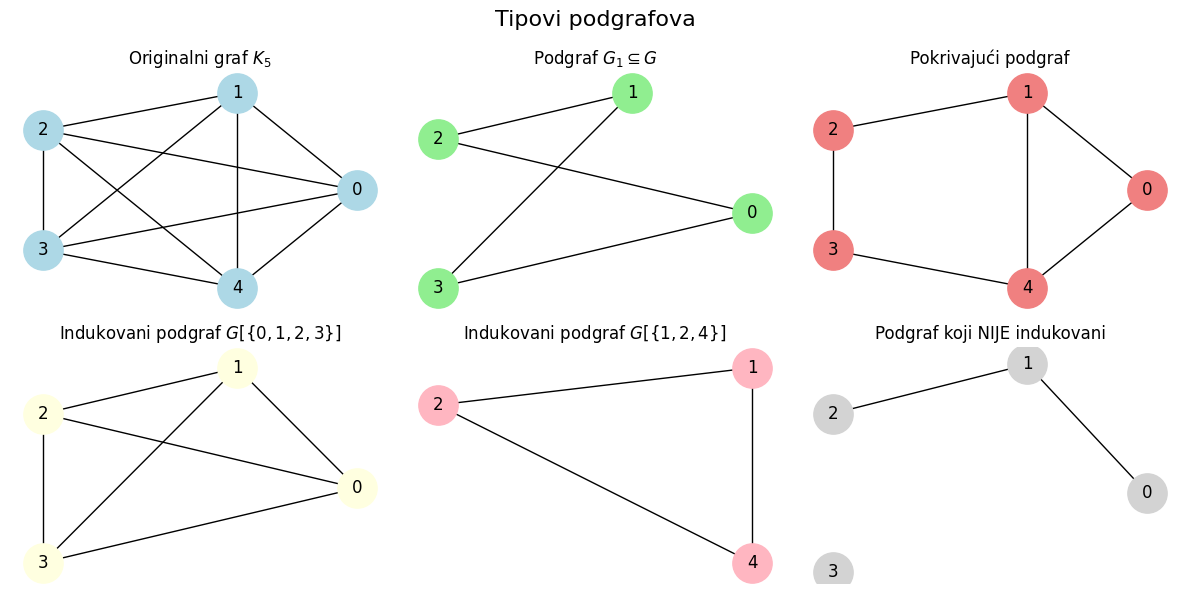

In [43]:
def demonstrate_subgraphs():
    """Demonstracija različitih tipova podgrafova"""
    
    # Kreiranje osnovnog grafa K5
    G = nx.complete_graph(5)
    pos = nx.circular_layout(G)
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    fig.suptitle("Tipovi podgrafova", fontsize=16)
    
    # Originalni graf
    nx.draw(G, pos, ax=axes[0,0], with_labels=True, 
            node_color='lightblue', node_size=800)
    axes[0,0].set_title("Originalni graf $K_5$")
    
    # 1. Običan podgraf - uklanjamo neke čvorove i grane
    G_sub = G.copy()
    G_sub.remove_edges_from([(0,1), (2,3), (3,4)])
    G_sub.remove_node(4)
    
    pos_sub = {k: v for k, v in pos.items() if k in G_sub.nodes()}
    nx.draw(G_sub, pos_sub, ax=axes[0,1], with_labels=True,
            node_color='lightgreen', node_size=800)
    axes[0,1].set_title("Podgraf $G_1 \subseteq G$")
    
    # 2. Pokrivajući podgraf - svi čvorovi, neke grane
    G_spanning = G.copy()
    G_spanning.remove_edges_from([(0,2), (1,3), (2,4), (0,3)])
    
    nx.draw(G_spanning, pos, ax=axes[0,2], with_labels=True,
            node_color='lightcoral', node_size=800)
    axes[0,2].set_title("Pokrivajući podgraf")
    
    # 3. Indukovani podgraf S = {0,1,2,3}
    S = [0, 1, 2, 3]
    G_induced = G.subgraph(S)
    
    pos_induced = {k: v for k, v in pos.items() if k in S}
    nx.draw(G_induced, pos_induced, ax=axes[1,0], with_labels=True,
            node_color='lightyellow', node_size=800)
    axes[1,0].set_title("Indukovani podgraf $G[\{0,1,2,3\}]$")
    
    # 4. Drugi indukovani podgraf S = {1,2,4}
    S2 = [1, 2, 4]
    G_induced2 = G.subgraph(S2)
    
    pos_induced2 = {k: v for k, v in pos.items() if k in S2}
    nx.draw(G_induced2, pos_induced2, ax=axes[1,1], with_labels=True,
            node_color='lightpink', node_size=800)
    axes[1,1].set_title("Indukovani podgraf $G[\{1,2,4\}]$")
    
    # 5. Primer razlike: podgraf vs indukovani podgraf
    # Kreiramo podgraf koji NIJE indukovani
    G_not_induced = nx.Graph()
    G_not_induced.add_nodes_from([0, 1, 2, 3])
    G_not_induced.add_edges_from([(0, 1), (1, 2)])  # Ne dodajemo (0,2), (1,3) itd.
    
    nx.draw(G_not_induced, pos_induced, ax=axes[1,2], with_labels=True,
            node_color='lightgray', node_size=800)
    axes[1,2].set_title("Podgraf koji NIJE indukovani")
    
    plt.tight_layout()
    plt.show()
    
demonstrate_subgraphs()

### 9.4 Operacije nad grafovima

=== OPERACIJE NAD GRAFOVIMA ===


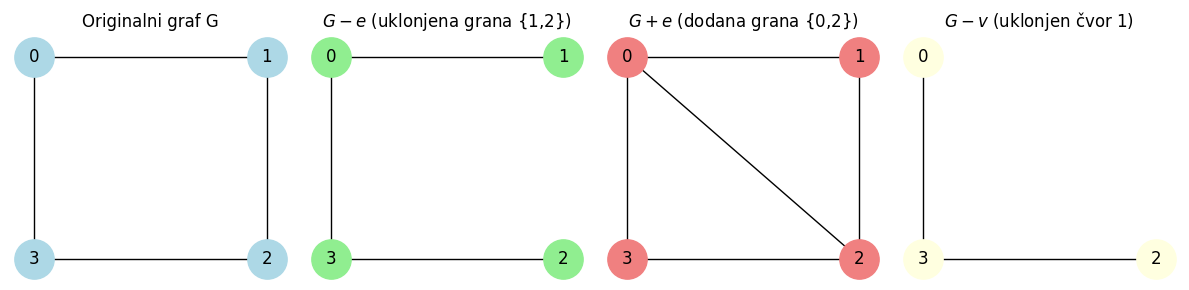

Rezultati operacija:
G:        |V|=4, |E|=4$, E=[(0, 1), (0, 3), (1, 2), (2, 3)]
G - e:    |V|=4, |E|=3, E=[(0, 1), (0, 3), (2, 3)]
G + e:    |V|=4, |E|=5, E=[(0, 1), (0, 3), (0, 2), (1, 2), (2, 3)]
G - v:    |V|=3, |E|=2, E=[(0, 3), (2, 3)]


In [42]:
def graph_operations():
    """Demonstracija operacija dodavanja/uklanjanja grana i čvorova"""
    
    print("=== OPERACIJE NAD GRAFOVIMA ===")
    
    # Početni graf
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (0, 3)])
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    pos = {0: (0, 1), 1: (1, 1), 2: (1, 0), 3: (0, 0)}
    
    # Originalni graf
    nx.draw(G, pos, ax=axes[0], with_labels=True,
            node_color='lightblue', node_size=800)
    axes[0].set_title("Originalni graf G")
    
    # G - e (uklanjanje grane)
    G_minus_e = G.copy()
    G_minus_e.remove_edge(1, 2)
    
    nx.draw(G_minus_e, pos, ax=axes[1], with_labels=True,
            node_color='lightgreen', node_size=800)
    axes[1].set_title("$G - e$ (uklonjena grana {1,2})")
    
    # G + e (dodavanje grane)
    G_plus_e = G.copy()
    G_plus_e.add_edge(0, 2)
    
    nx.draw(G_plus_e, pos, ax=axes[2], with_labels=True,
            node_color='lightcoral', node_size=800)
    axes[2].set_title("$G + e$ (dodana grana {0,2})")
    
    # G - v (uklanjanje čvora)
    G_minus_v = G.copy()
    G_minus_v.remove_node(1)
    
    pos_minus_v = {k: v for k, v in pos.items() if k != 1}
    nx.draw(G_minus_v, pos_minus_v, ax=axes[3], with_labels=True,
            node_color='lightyellow', node_size=800)
    axes[3].set_title("$G - v$ (uklonjen čvor 1)")
    
    plt.tight_layout()
    plt.show()
    
    print("Rezultati operacija:")
    print(f"G:        |V|={len(G.nodes())}, |E|={len(G.edges())}$, E={list(G.edges())}")
    print(f"G - e:    |V|={len(G_minus_e.nodes())}, |E|={len(G_minus_e.edges())}, E={list(G_minus_e.edges())}")
    print(f"G + e:    |V|={len(G_plus_e.nodes())}, |E|={len(G_plus_e.edges())}, E={list(G_plus_e.edges())}")
    print(f"G - v:    |V|={len(G_minus_v.nodes())}, |E|={len(G_minus_v.edges())}, E={list(G_minus_v.edges())}")

graph_operations()

## Zaključak

Ovaj notebook je pokrio sledeće ključne teme iz teorije grafova:

1. **Istorijski razvoj** - od Eulerovih mostova do moderne primene
2. **Problem Kenigsberga** - rođenje teorije grafova  
3. **Oblasti primene** - informatika, biologija, društvene nauke
4. **Definicije grafova** - multigrafi, prosti grafovi, specijalni tipovi
5. **Izomorfizam** - centralni koncept za poređenje grafova
6. **Algoritmi** - praktični pristup ispitivanju izomorfizma
7. **Podgrafovi** - struktura unutar strukture

### Ključne teoreme i rezultati:

- **Handshaking Lemma**: $\sum_{v \in V} \deg(v) = 2|E|$
- **Eulerova teorema**: Graf ima Eulerovu putanju $\iff$ ima 0 ili 2 čvora neparnog stepena  
- **Izomorfizam je relacija ekvivalencije** na skupu svih prostih grafova
- **Potrebni uslovi za izomorfizam**: isti broj čvorova, grana i identične sekvence stepena